# Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
from orbit_generation.dataset import get_orbit_features_from_folder, get_full_fixed_step_dataset, get_first_period_of_fixed_period_dataset
from orbit_generation.data import sample_orbits
from orbit_generation.propagation import calculate_errors
from orbit_generation.constants import EM_MU, ORBIT_CLASS_DF
from orbit_generation.visualize import plot_grouped_features, plot_value_proportions

## Number of Orbits

In [3]:
file_path = '/orbit-generation/data/orbits_fix_1500/'
df = get_orbit_features_from_folder(file_path)
df.shape

(270808, 13)

In [4]:
df.head()

id_class       x_0           y_0       x_0          vx_0      vy_0  \
0       1.0  0.999992  4.887750e-21  0.025876  6.607112e-13 -0.000770   
1       1.0  1.000000  4.887750e-21  0.025653  6.901333e-13 -0.000781   
2       1.0  1.000007  4.887750e-21  0.025429  7.150345e-13 -0.000791   
3       1.0  1.000014  4.887750e-21  0.025205  7.486895e-13 -0.000802   
4       1.0  1.000021  4.887750e-21  0.024981  7.592134e-13 -0.000813   

           vz_0    jacobi     period    stability  propagated_periods  \
0  1.420440e-10  2.999331  12.539024  7732.189630                 2.0   
1  1.346874e-10  2.999343  12.538403  7715.041066                 2.0   
2  1.276744e-10  2.999354  12.537764  7697.387372                 2.0   
3  1.231947e-10  2.999366  12.537104  7679.209803                 2.0   
4  1.155993e-10  2.999377  12.536423  7660.490334                 2.0   

   original_index system  
0               0     MP  
1               1     MP  
2               2     MP  
3               3     MP  
4               4     MP

In [5]:
df['system'].value_counts()

EM     45211
SaT    42255
SE     41044
JE     40616
SaE    36196
MP     34904
SM     30582
Name: system, dtype: int64

## Orbit Classification

In [6]:
ORBIT_CLASS_DF.head(50)

Id    Label         Type             Subtype         Direction
0    1     S_BN  System-wide           Butterfly             North
1    2     S_BS  System-wide           Butterfly             South
2    3     S_DN  System-wide           Dragonfly             North
3    4    S_DPO  System-wide    Distant Prograde            Planar
4    5    S_DRO  System-wide  Distant Retrograde            Planar
5    6     S_DS  System-wide           Dragonfly             South
6    7   S_L1_A           L1               Axial  No specification
7    8  S_L1_HN           L1                Halo             North
8    9  S_L1_HS           L1                Halo             South
9   10   S_L1_L           L1            Lyapunov            Planar
10  11   S_L1_V           L1            Vertical  No specification
11  12   S_L2_A           L2               Axial  No specification
12  13  S_L2_HN           L2                Halo             North
13  14  S_L2_HS           L2                Halo             South
14  15   S_L2_L           L2            Lyapunov            Planar
15  16   S_L2_V           L2            Vertical  No specification
16  17   S_L3_A           L3               Axial  No specification
17  18  S_L3_HN           L3                Halo             North
18  19  S_L3_HS           L3                Halo             South
19  20   S_L3_L           L3            Lyapunov            Planar
20  21   S_L3_V           L3            Vertical  No specification
21  22   S_L4_A           L4               Axial  No specification
22  23  S_L4_LP           L4         Long Period  No specification
23  24  S_L4_SP           L4        Short Period  No specification
24  25   S_L4_V           L4            Vertical  No specification
25  26   S_L5_A           L5               Axial  No specification
26  27  S_L5_LP           L5         Long Period  No specification
27  28  S_L5_SP           L5        Short Period  No specification
28  29   S_L5_V           L5            Vertical  No specification
29  30   S_LPOE  System-wide        Low Prograde              East
30  31   S_LPOW  System-wide        Low Prograde              West
31  32    S_R11     Resonant        Resonant 1,1            Planar
32  33    S_R12     Resonant        Resonant 1,2            Planar
33  34    S_R13     Resonant        Resonant 1,3            Planar
34  35    S_R14     Resonant        Resonant 1,4            Planar
35  36    S_R21     Resonant        Resonant 2,1            Planar
36  37    S_R23     Resonant        Resonant 2,3            Planar
37  38    S_R31     Resonant        Resonant 3,1            Planar
38  39    S_R32     Resonant        Resonant 3,2            Planar
39  40    S_R34     Resonant        Resonant 3,4            Planar
40  41    S_R41     Resonant        Resonant 4,1            Planar
41  42    S_R43     Resonant        Resonant 4,3            Planar

### Total Classes

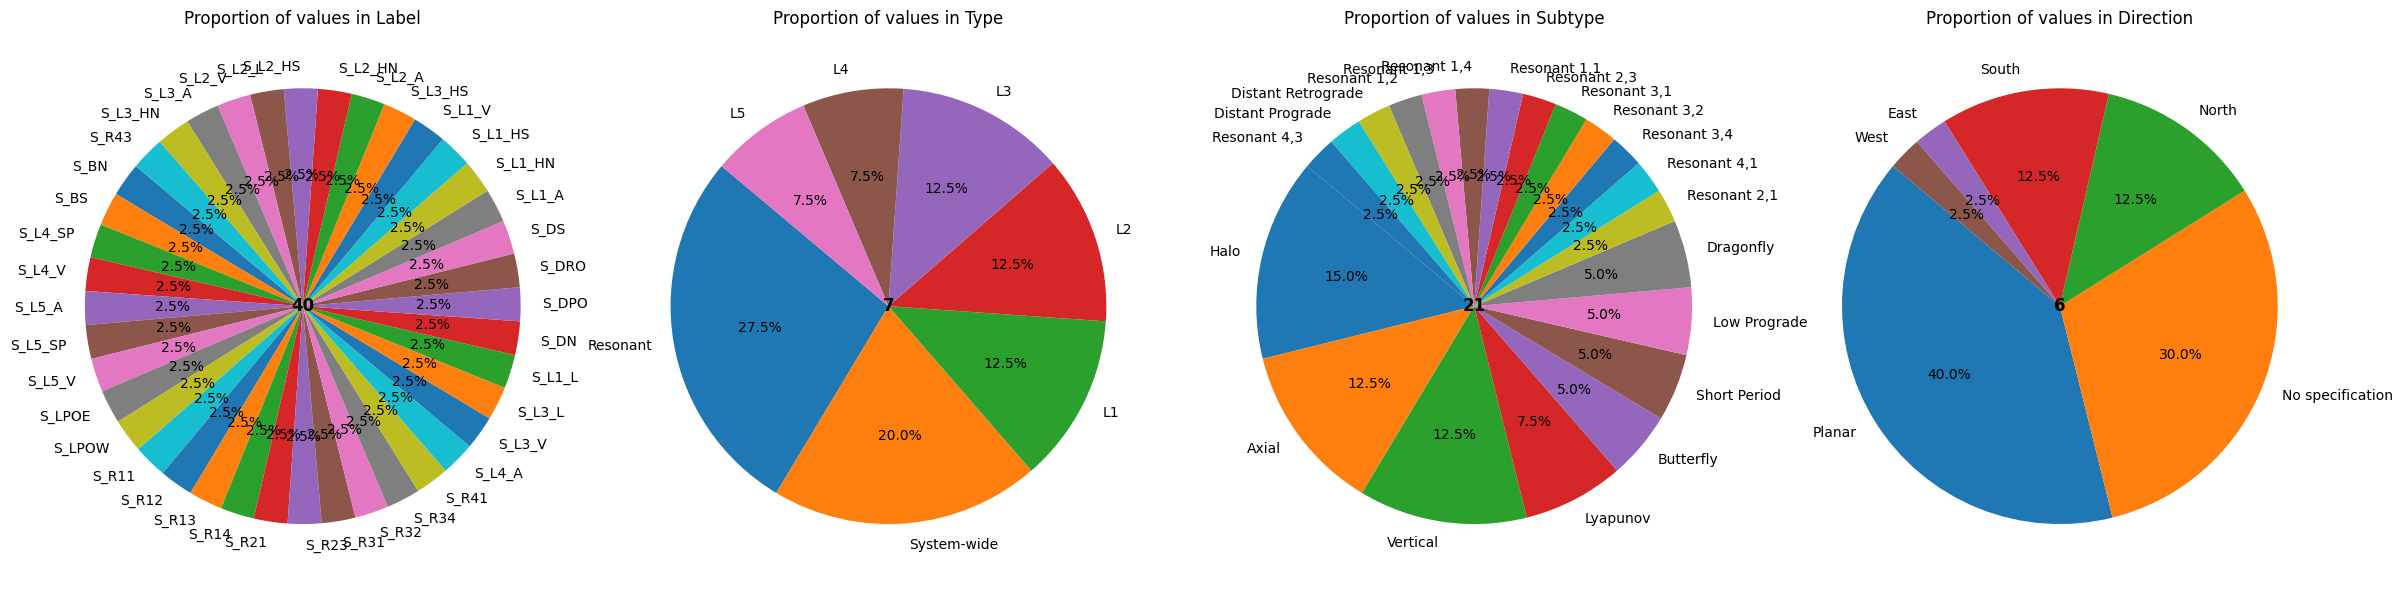

In [7]:
plot_value_proportions(df=ORBIT_CLASS_DF, values_list=df['id_class'].to_list(), id_col='Id')

### Classes by System

System EM


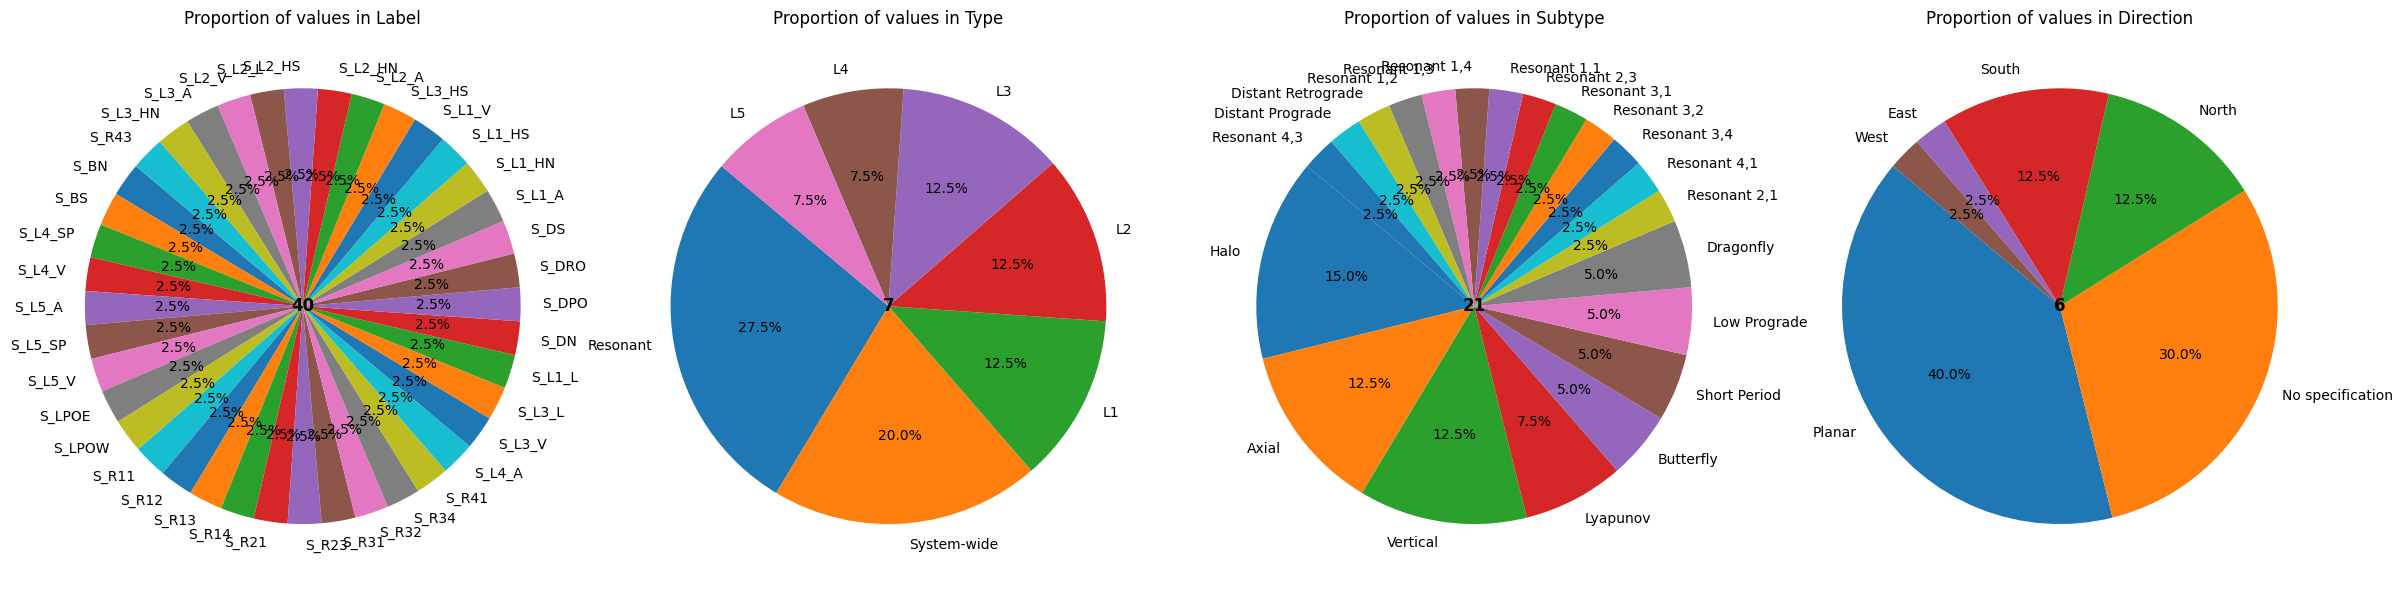

System JE


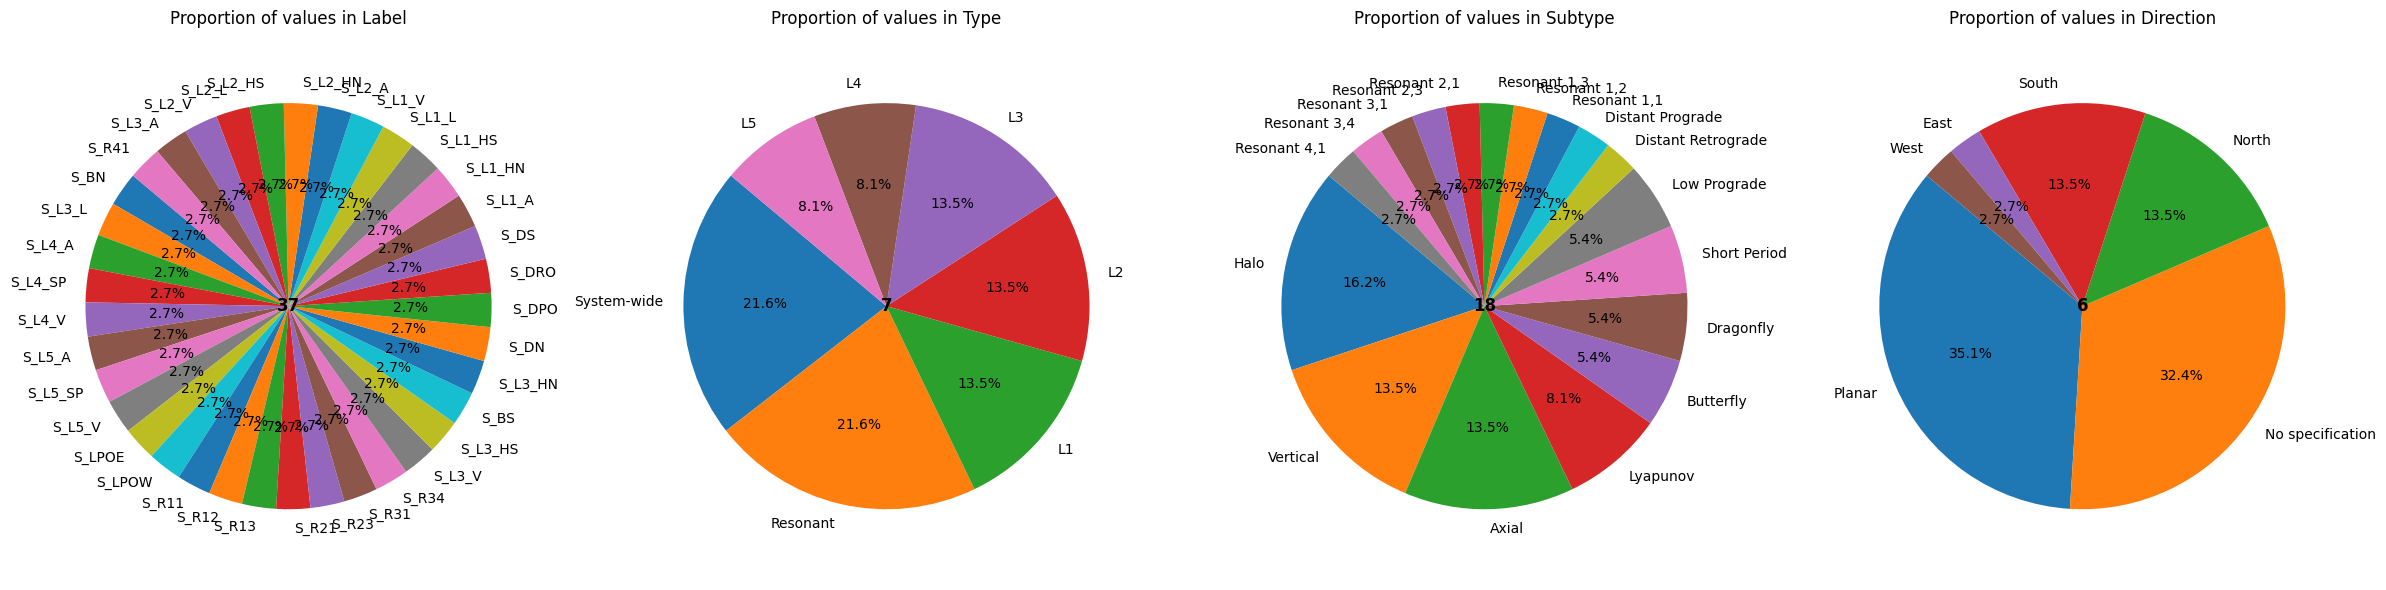

System MP


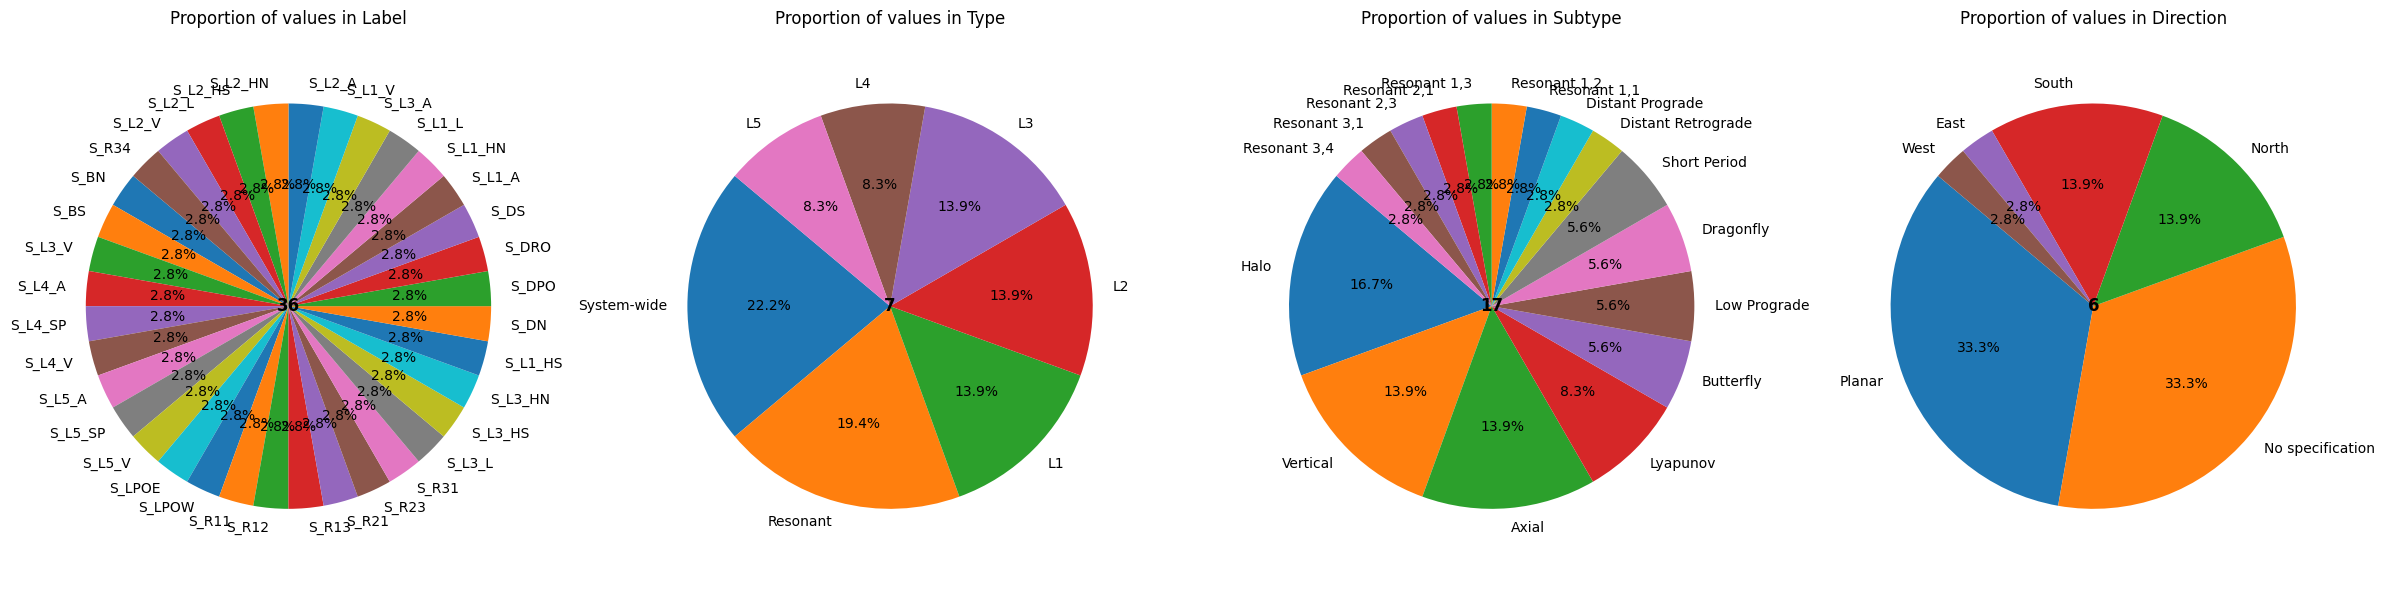

System SE


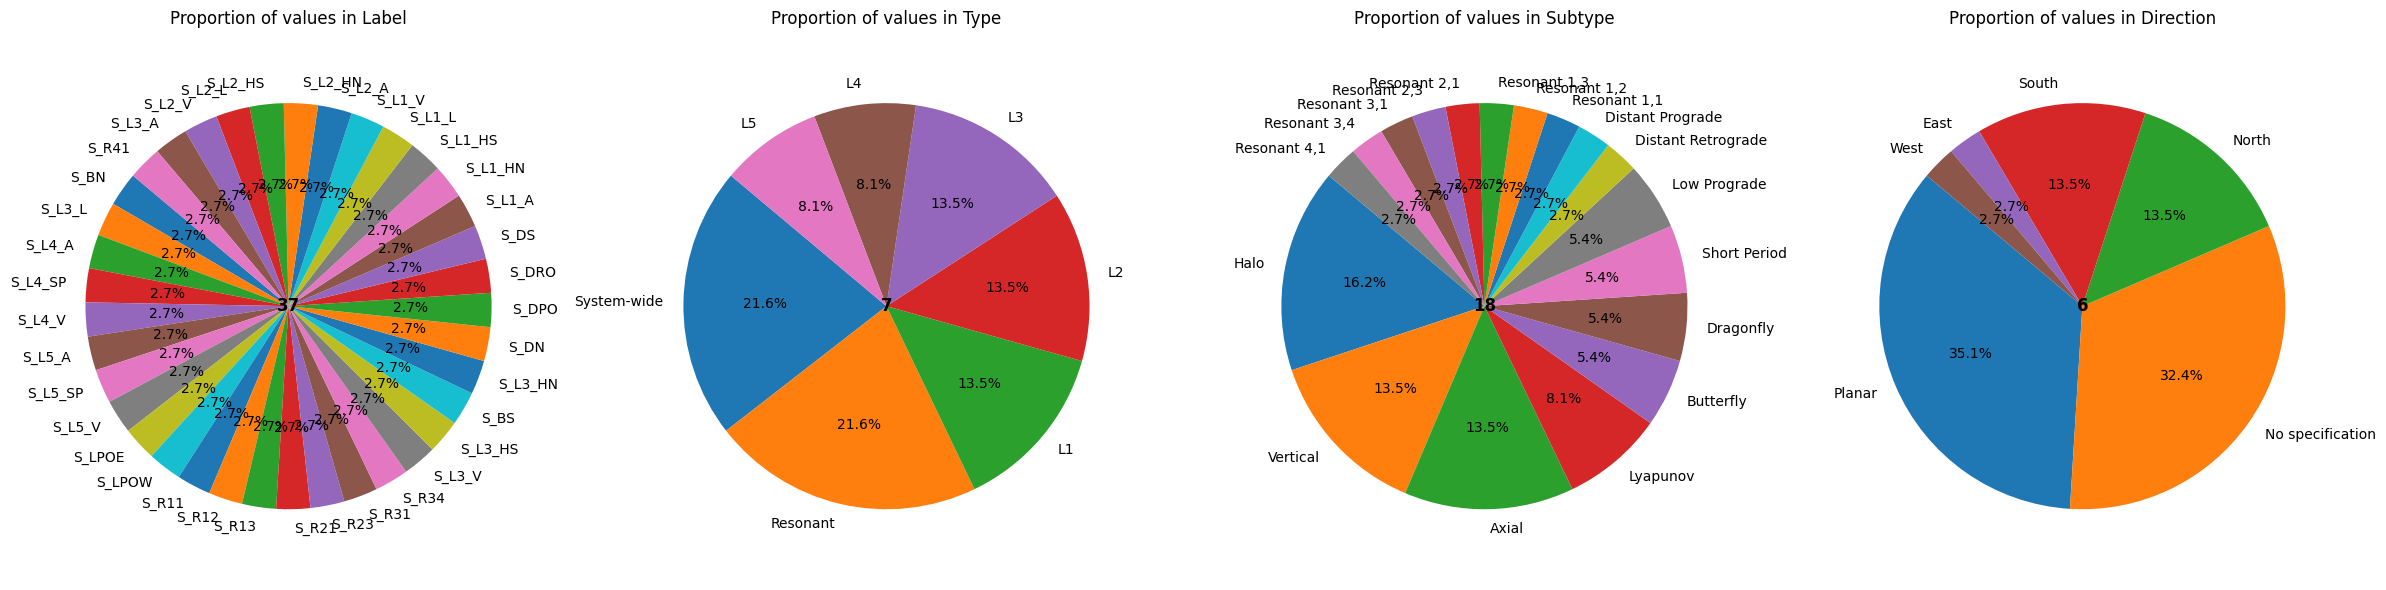

System SM


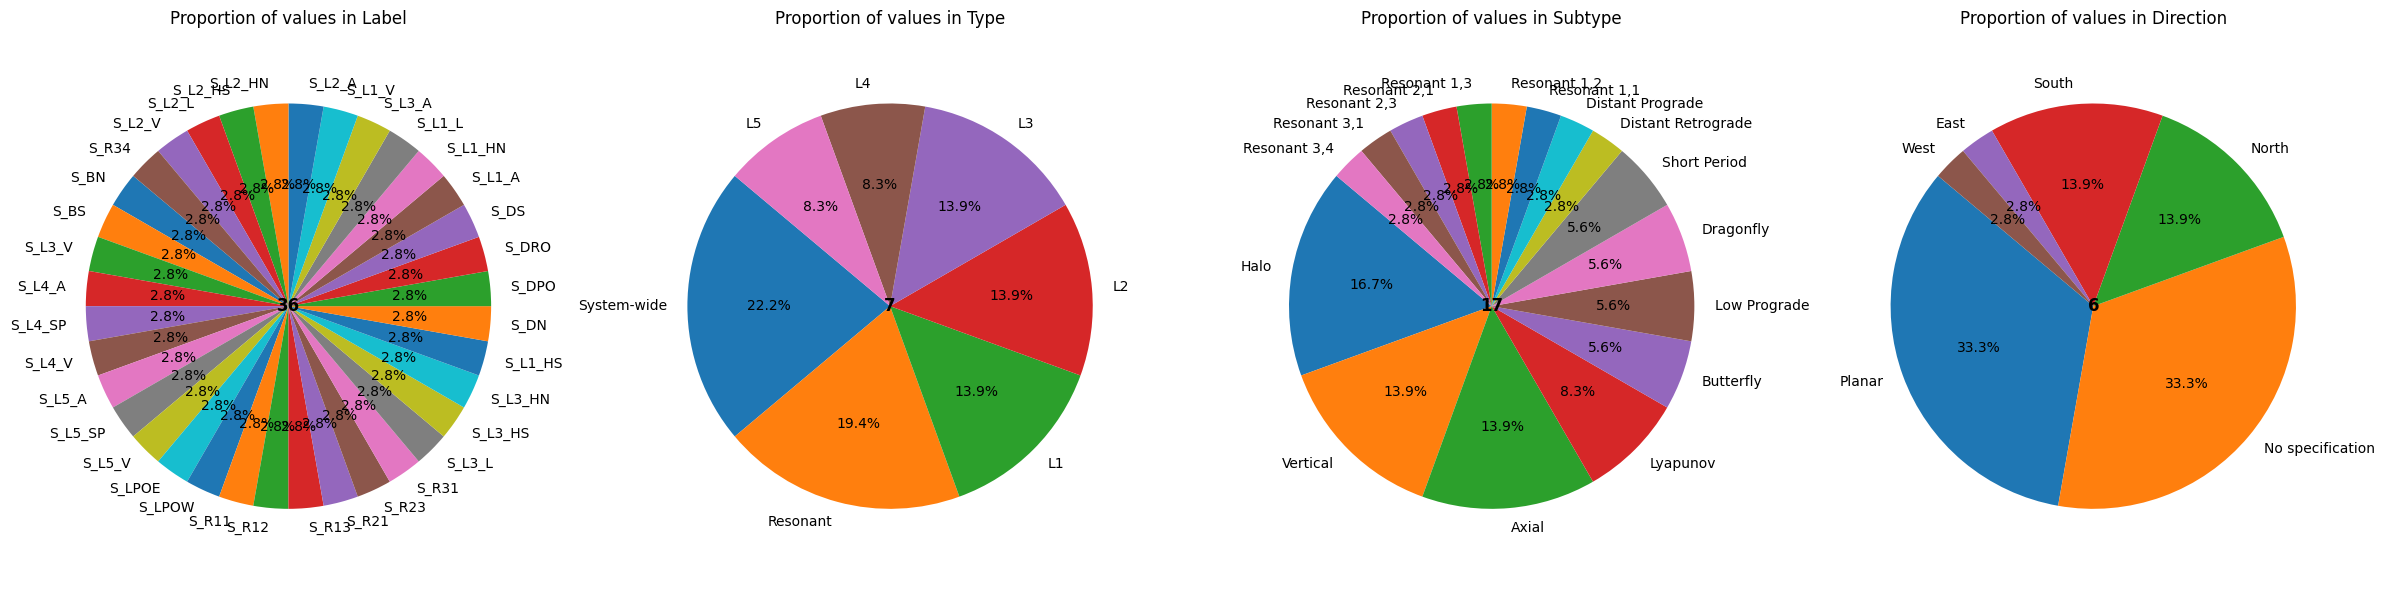

System SaE


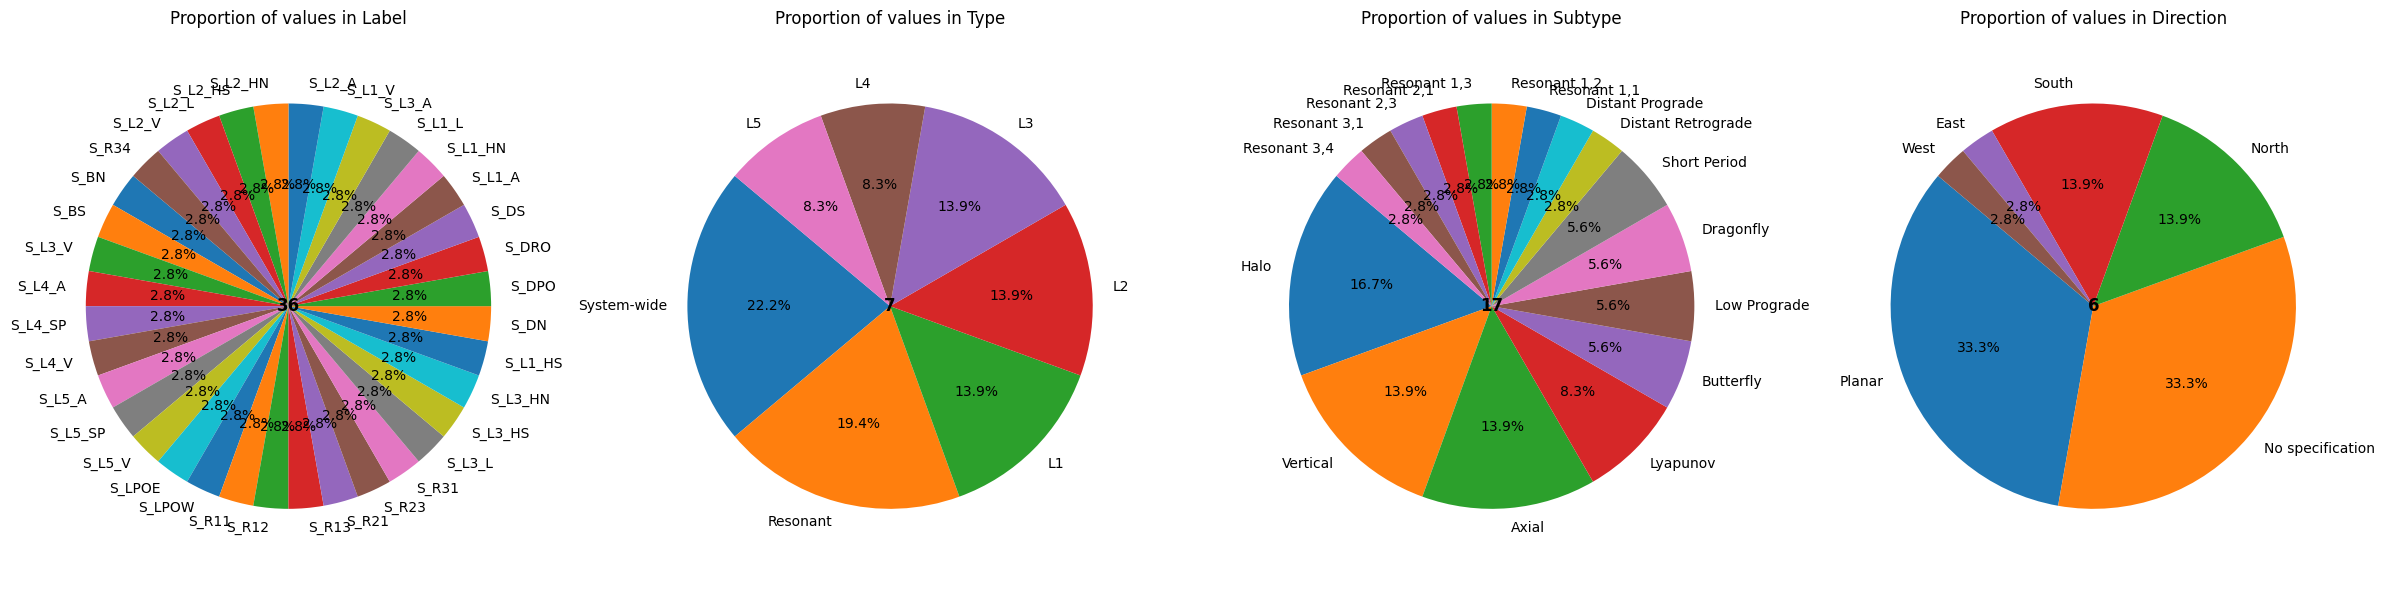

System SaT


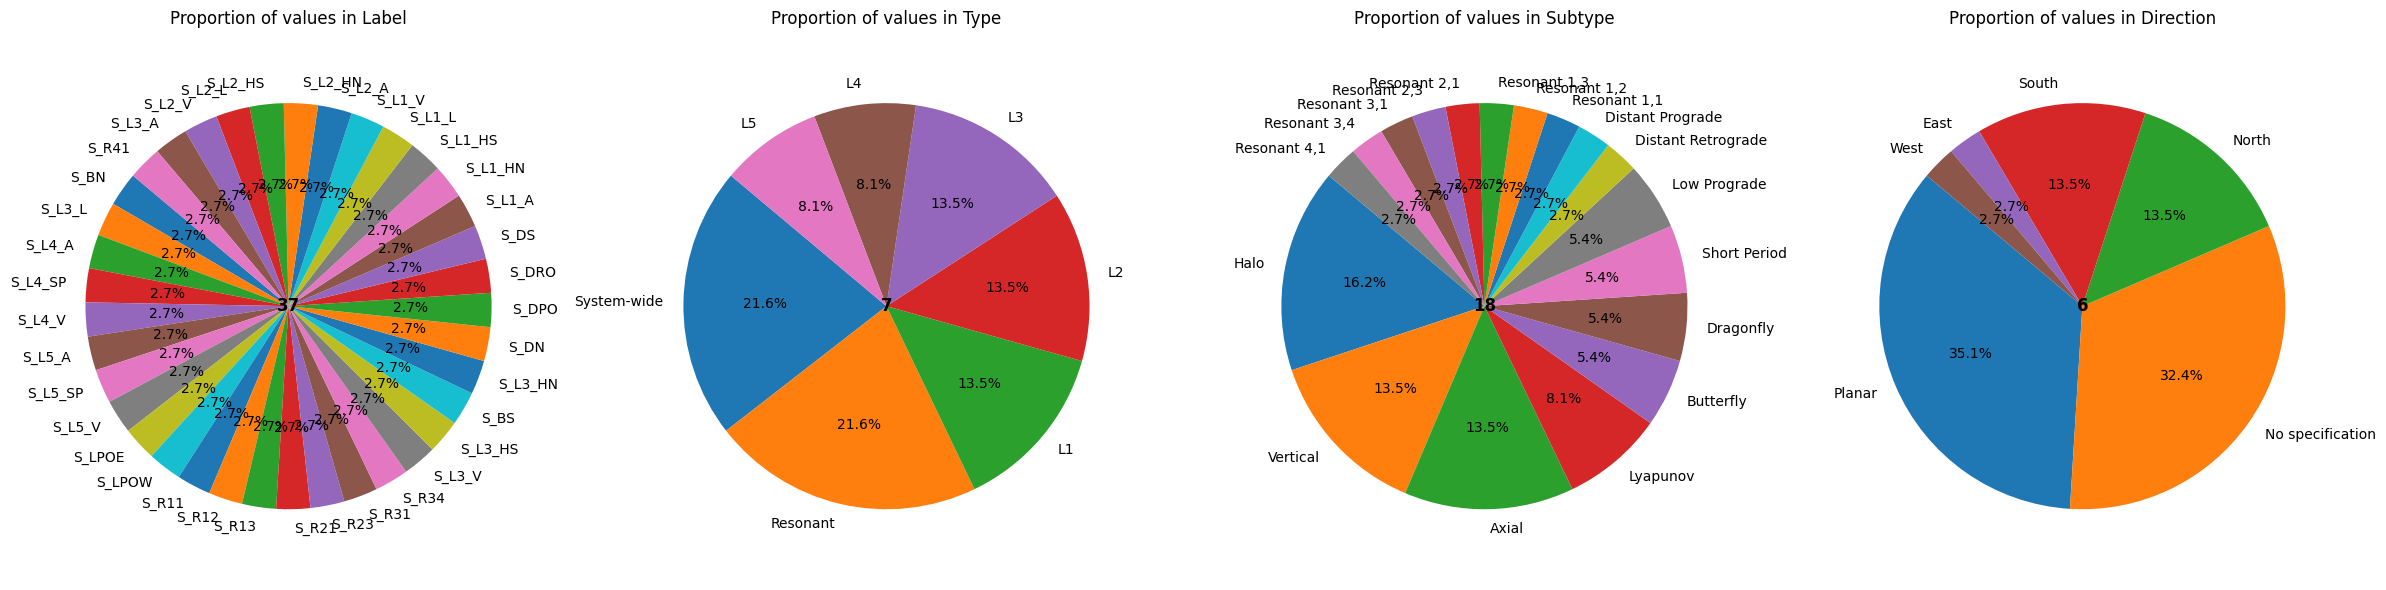

In [8]:
grouped = df.groupby('system')

for group_name, group_df in grouped:
    print(f"System {group_name}")
    plot_value_proportions(df=ORBIT_CLASS_DF, values_list=group_df['id_class'].to_list(), id_col='Id')

## Orbit Features

In [9]:
orbit_df_with_classes = pd.merge(df, ORBIT_CLASS_DF, how='left', left_on='id_class', right_on='Id')

### By System

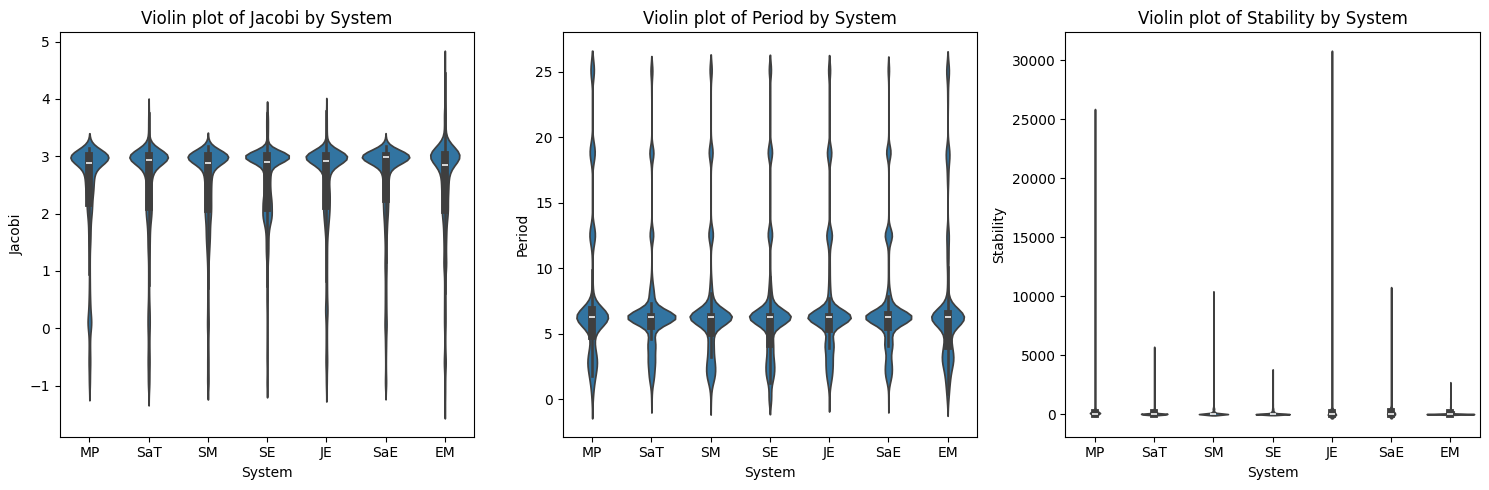

In [10]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='system', plot_type='violin')

### By Big Family

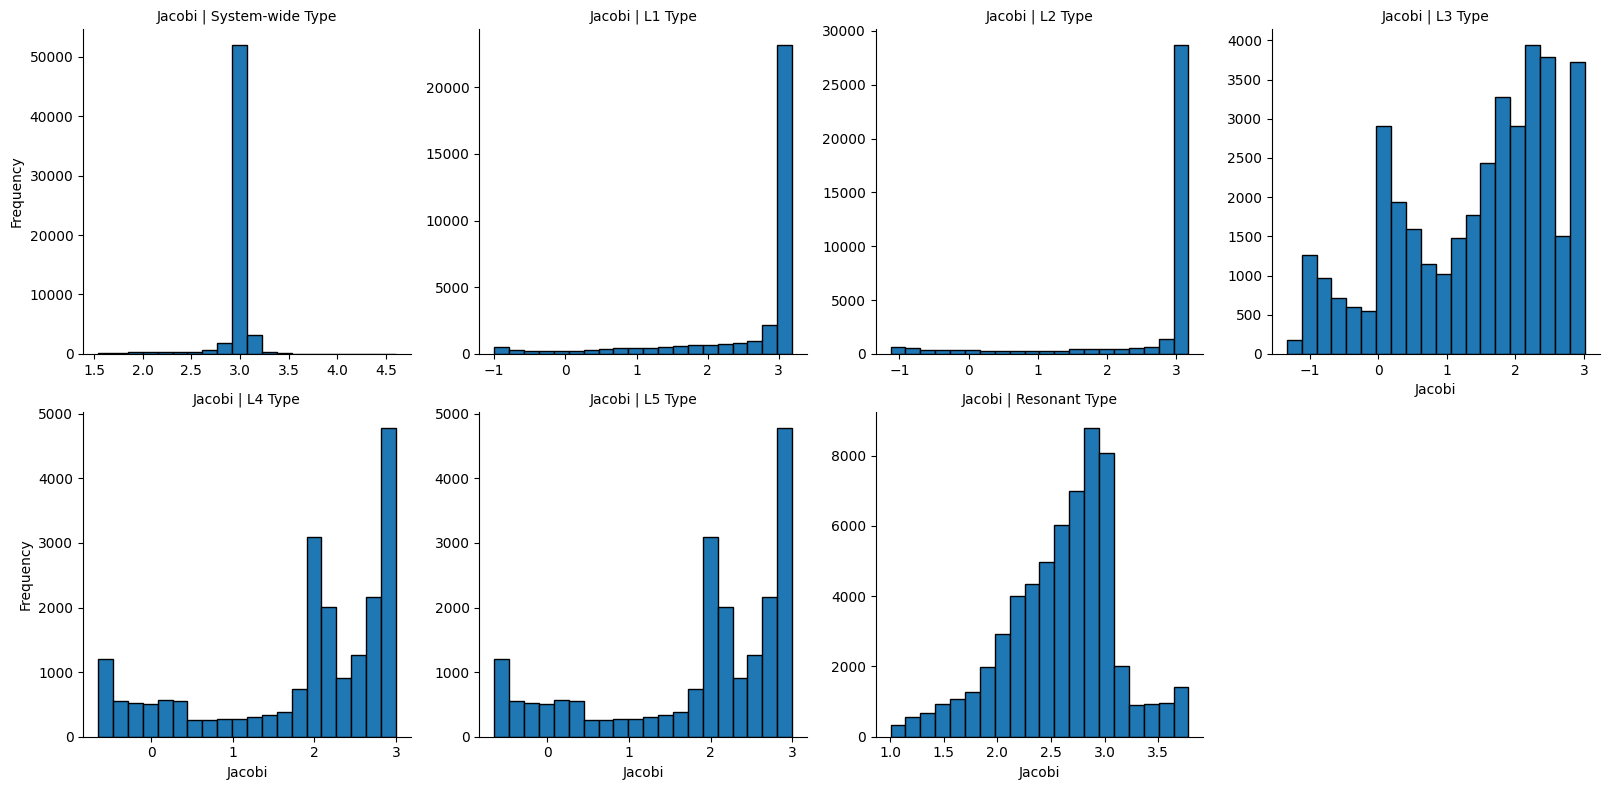

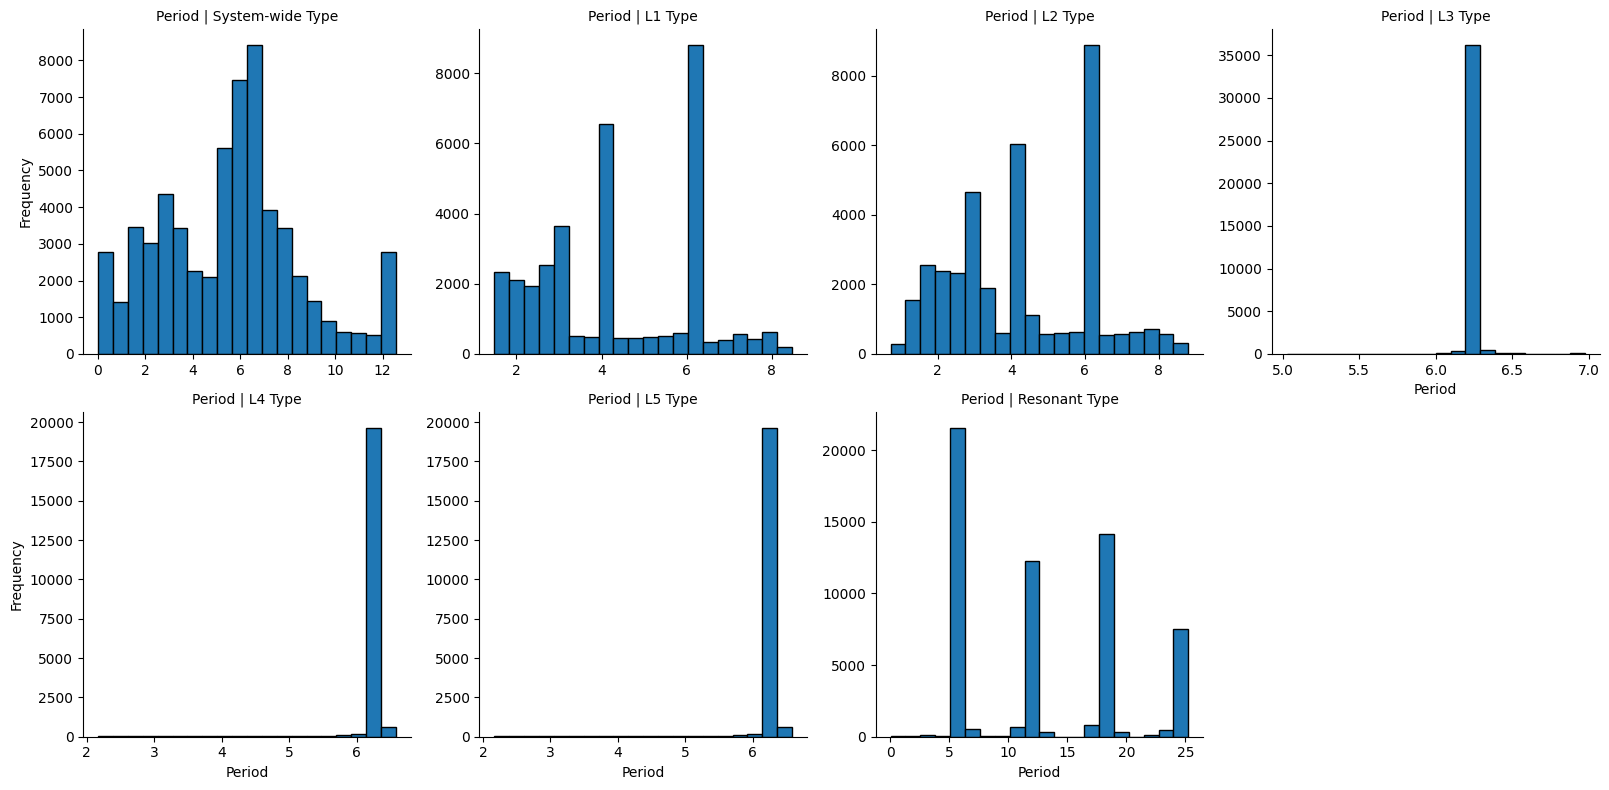

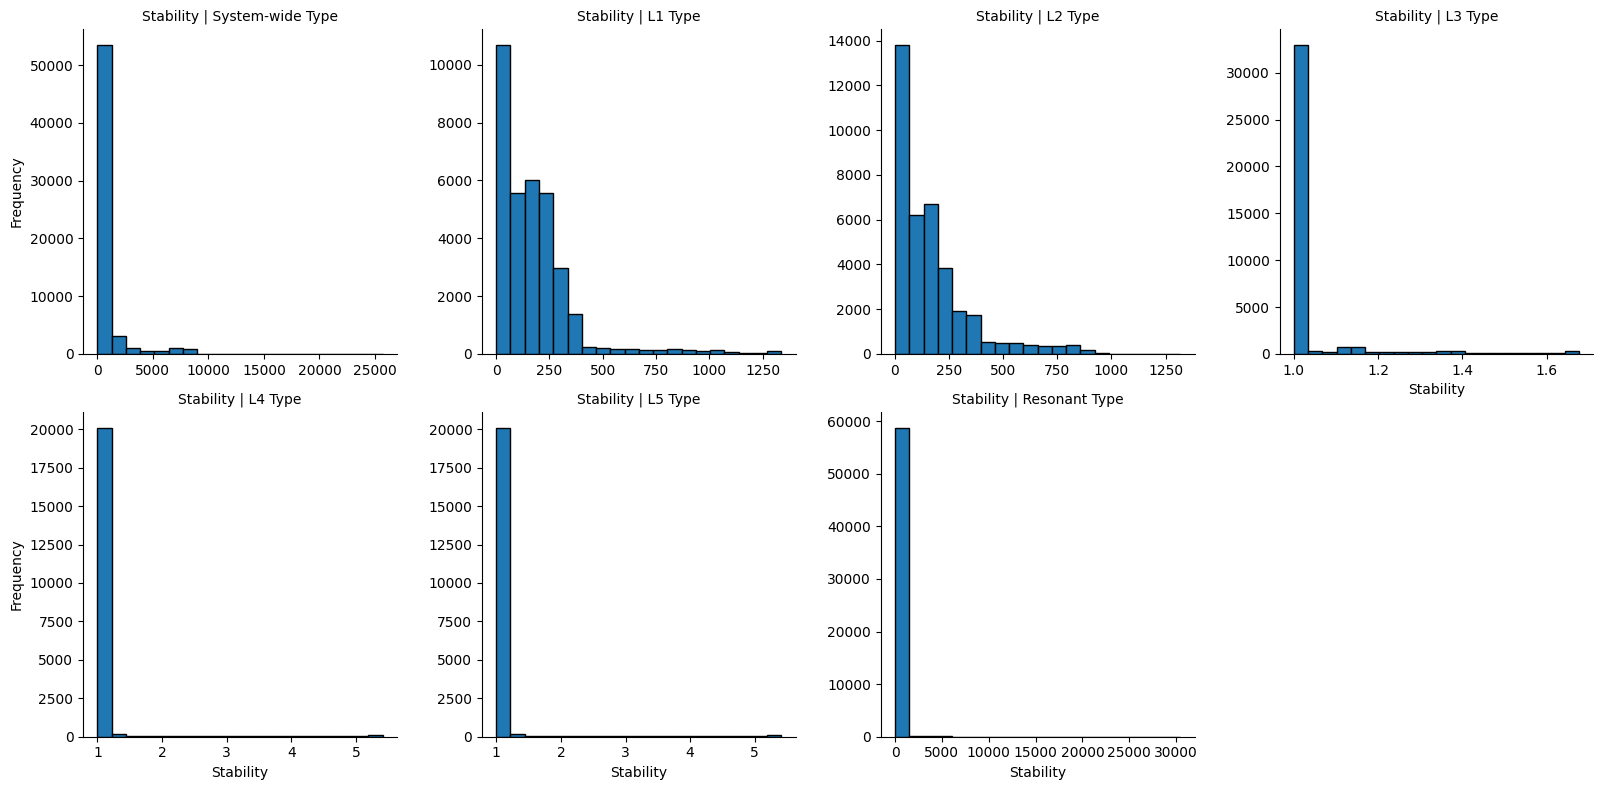

In [11]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Type', plot_type='facetgrid')

### By "Subfamily"

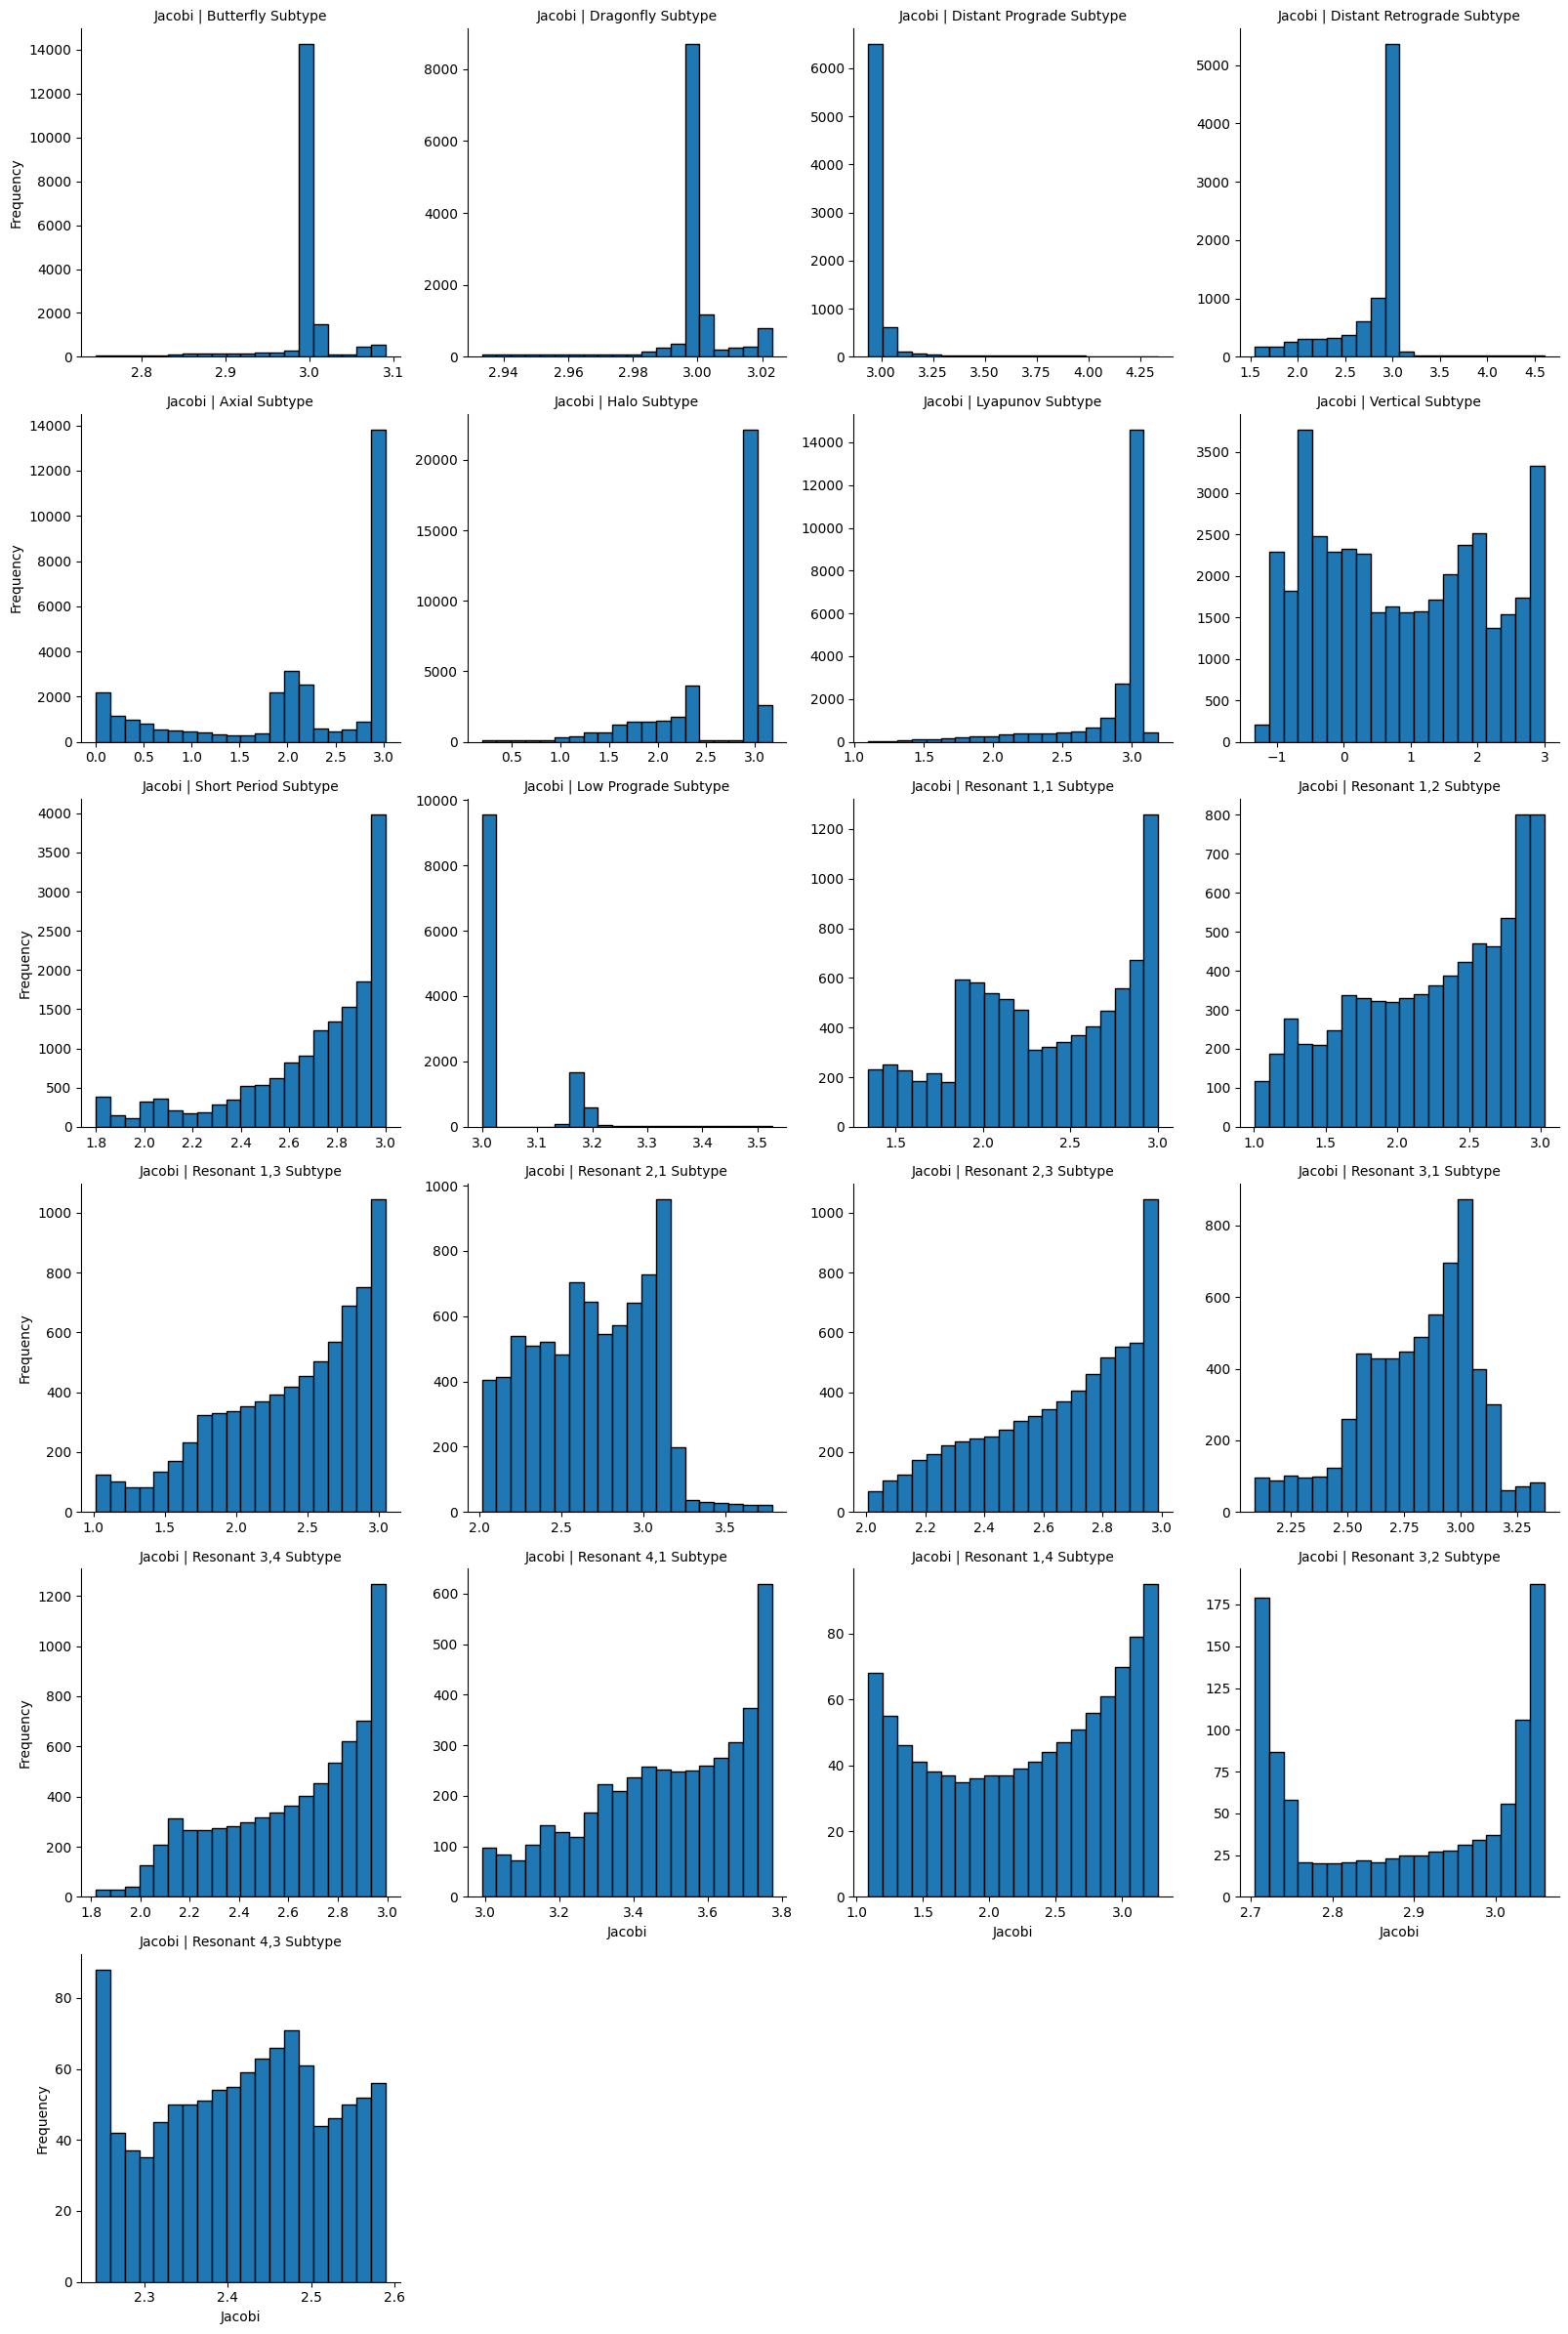

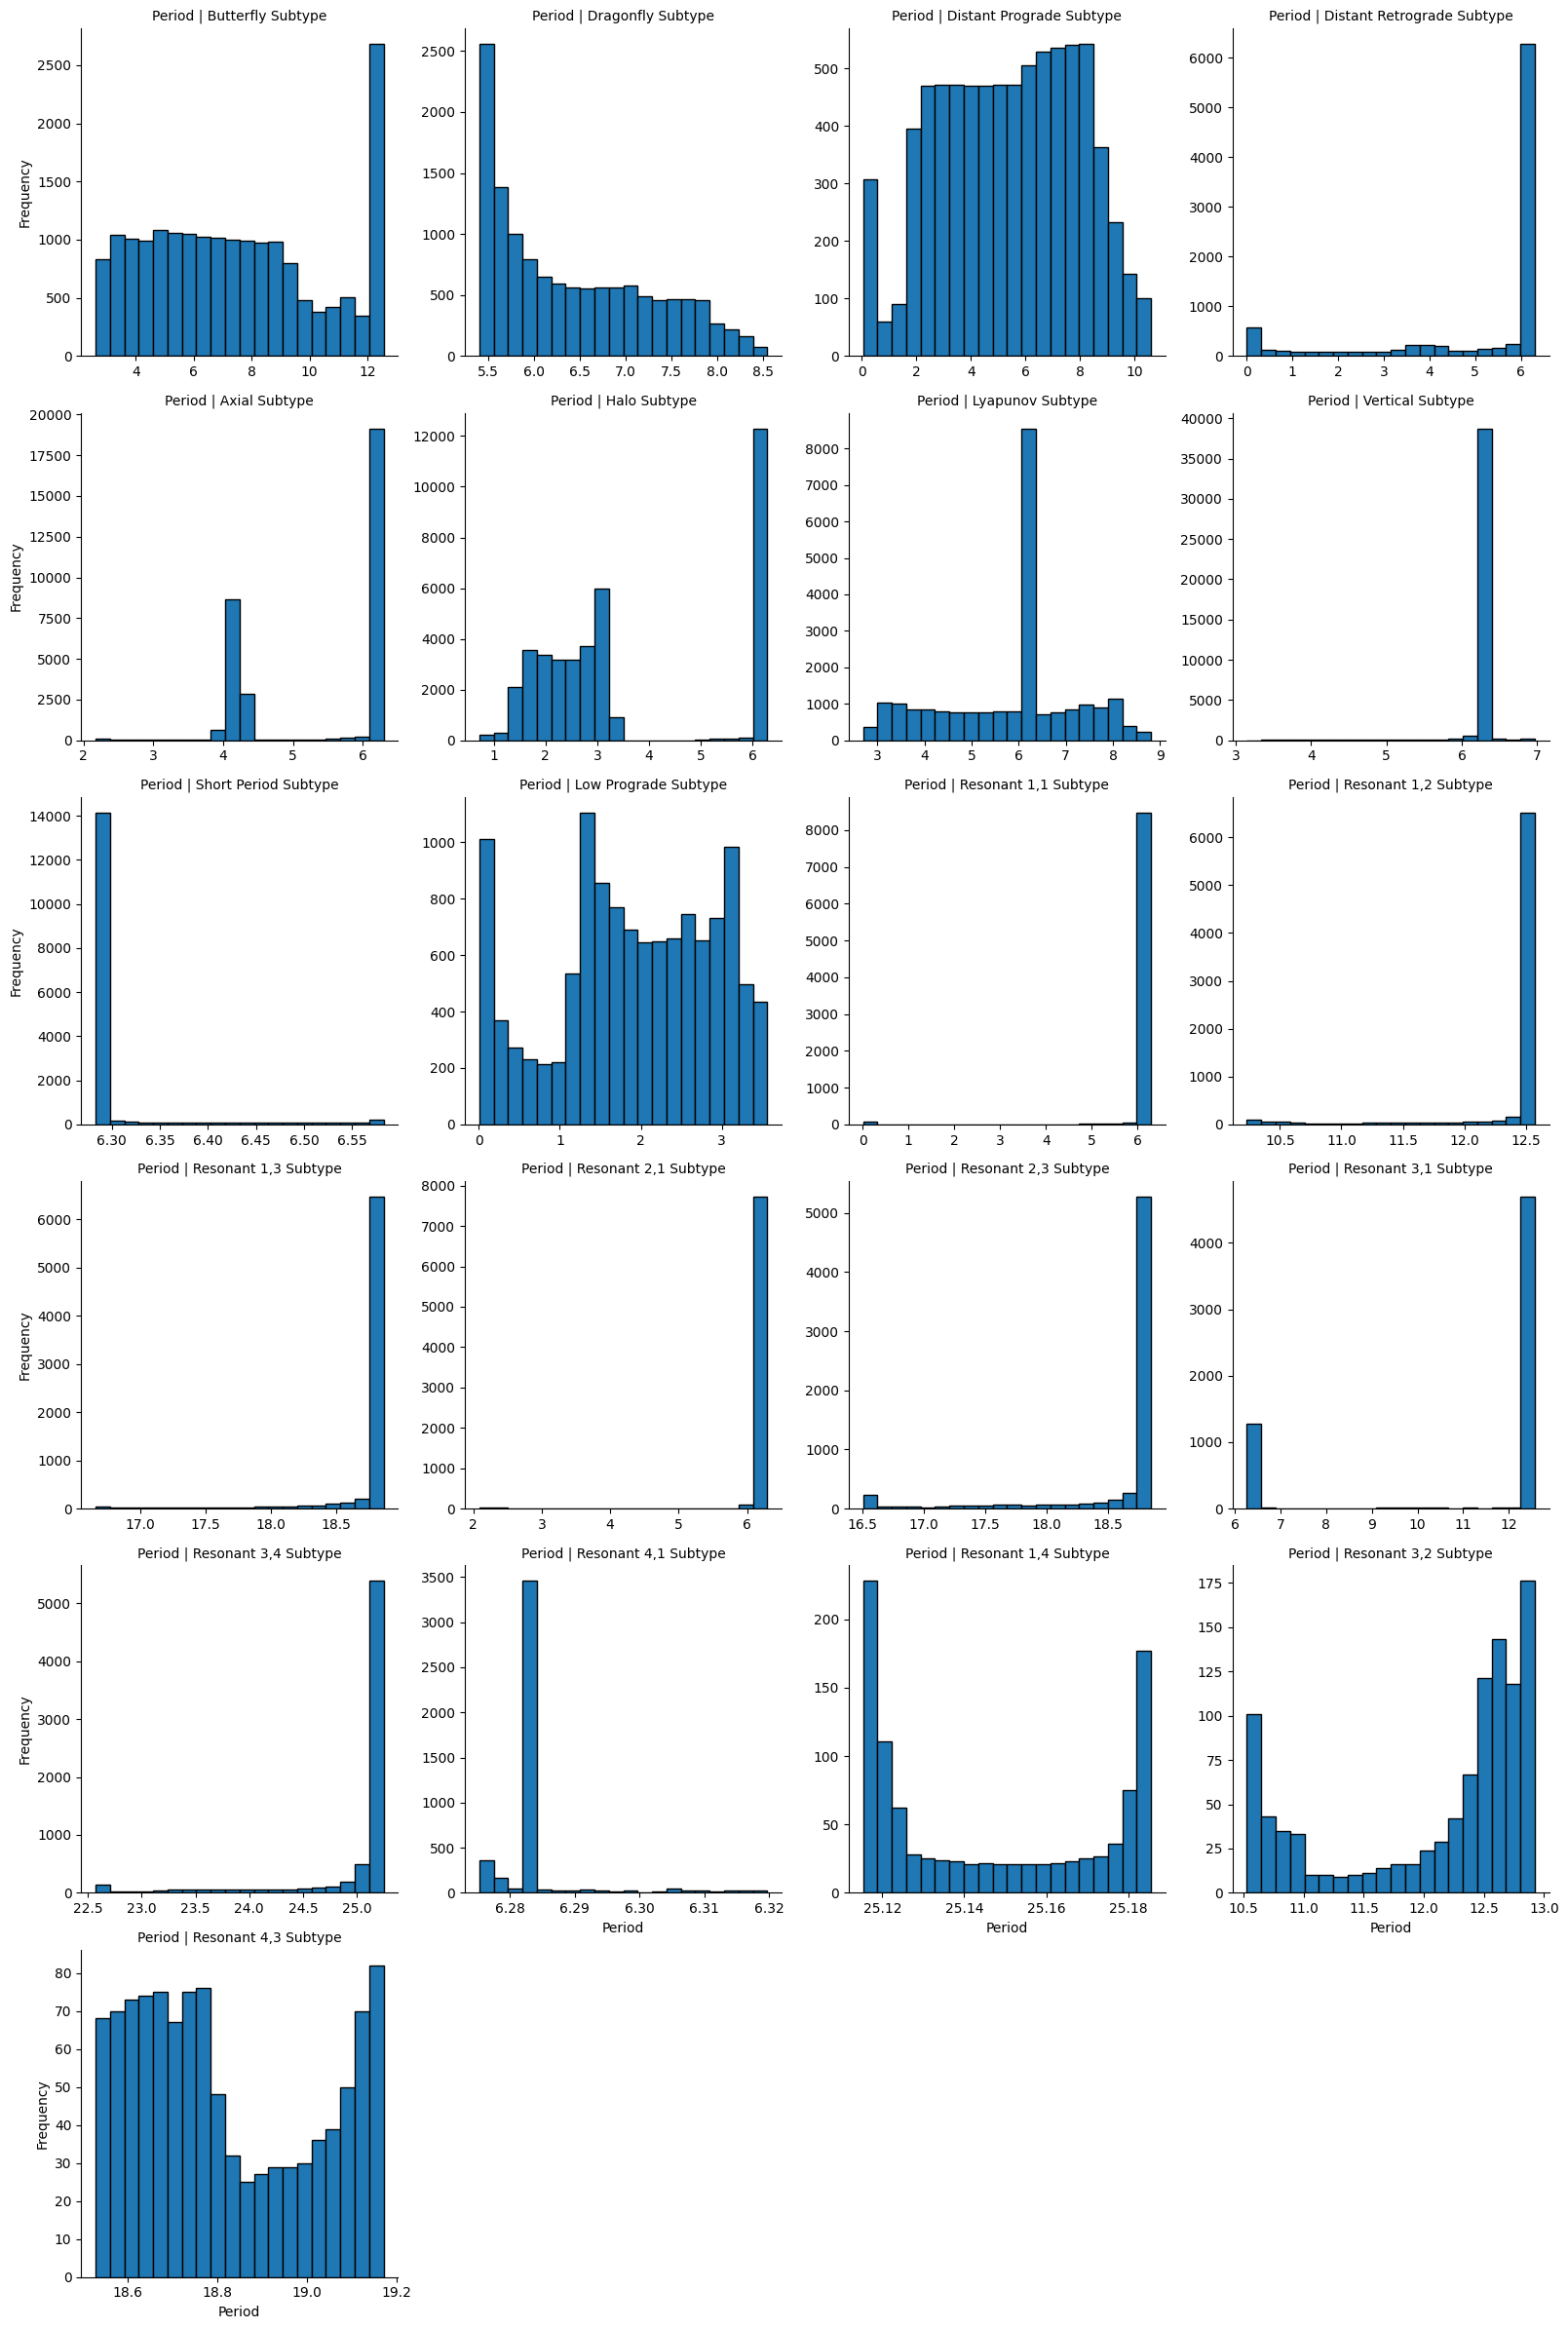

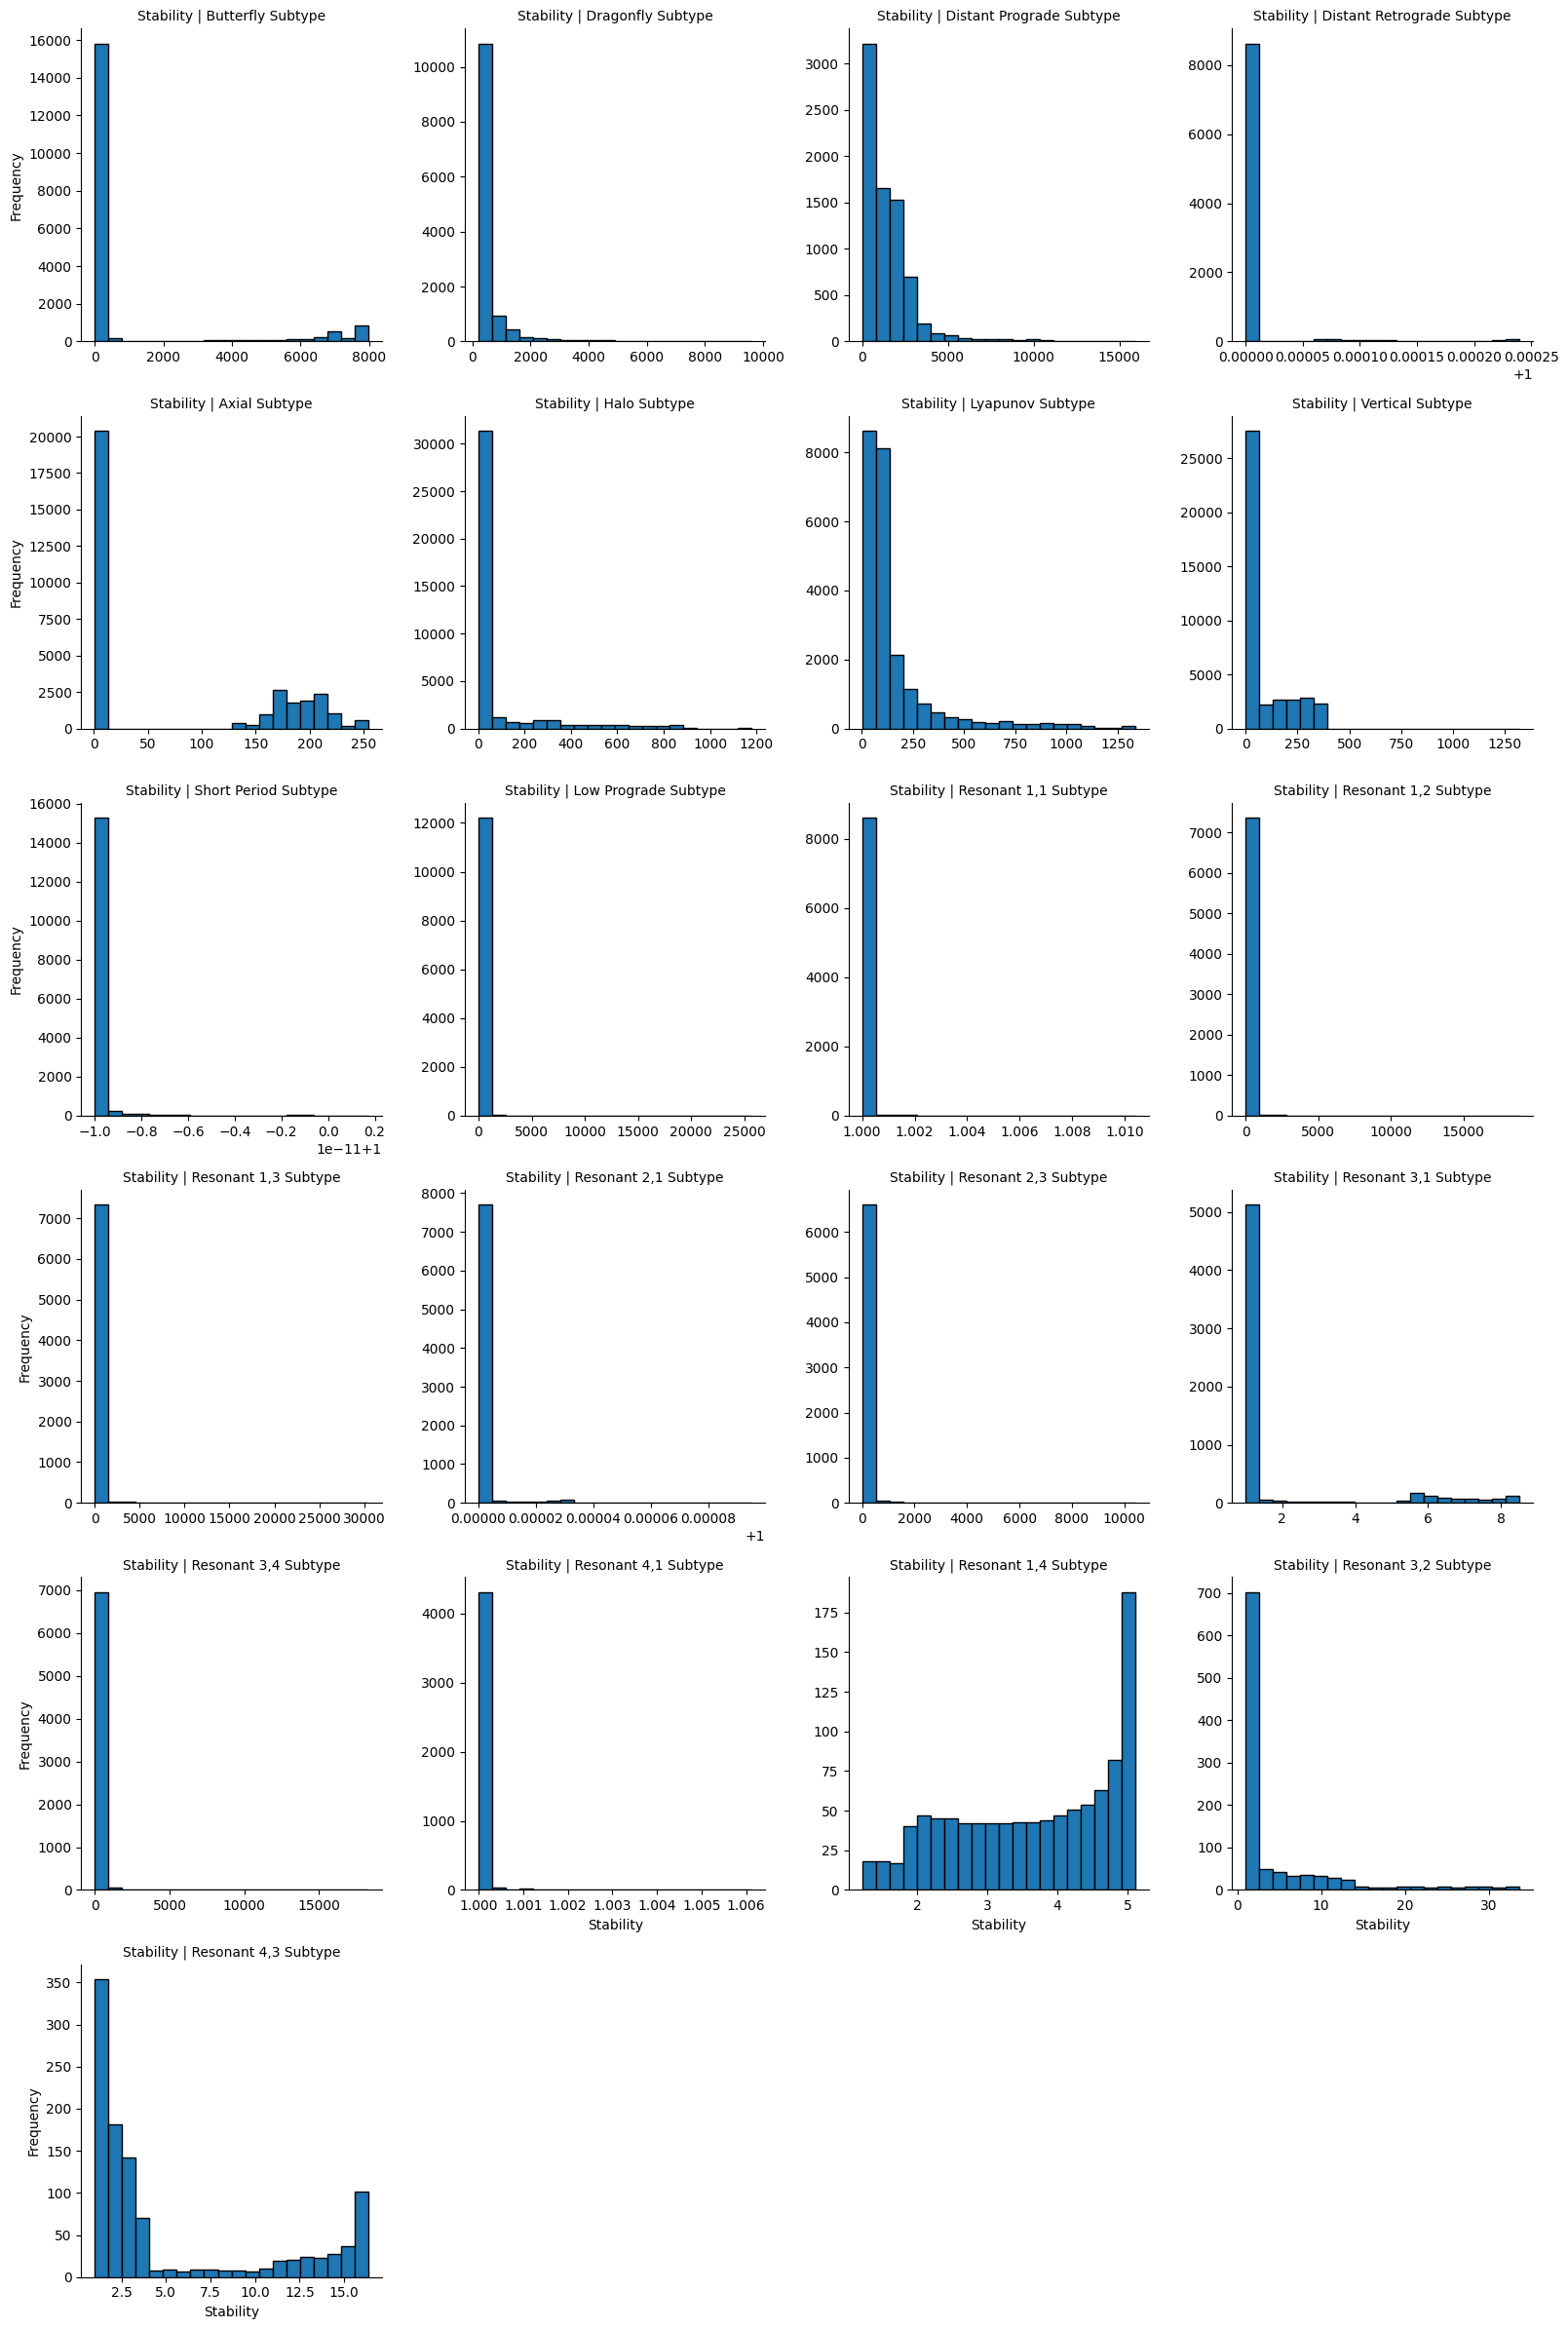

In [12]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Subtype', plot_type='facetgrid')

### By Direction

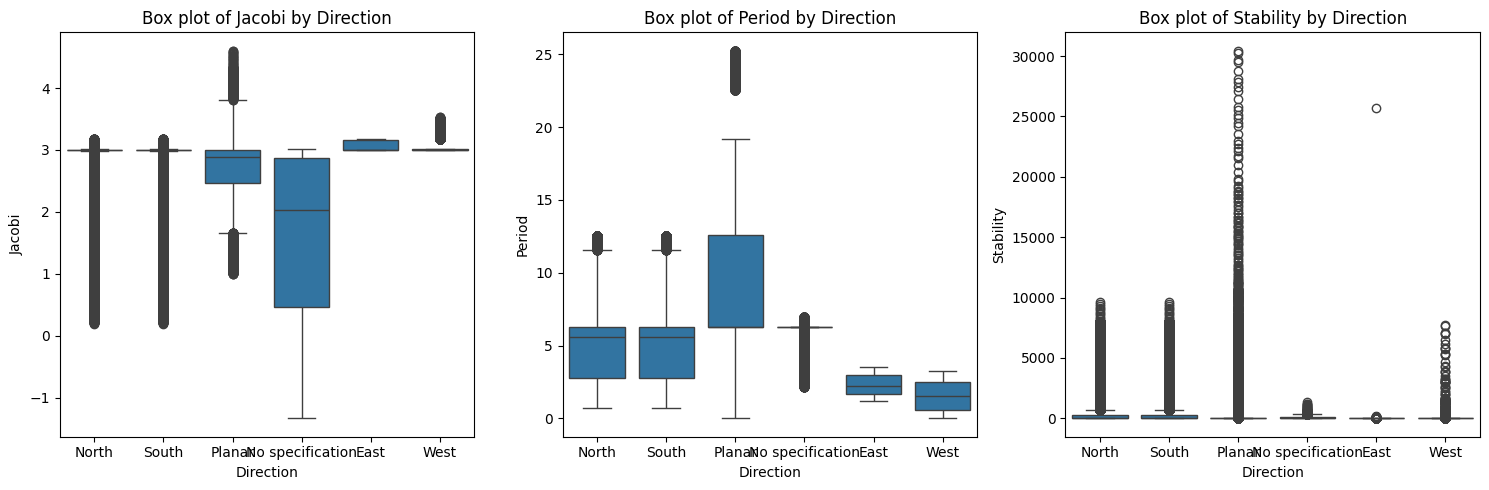

In [13]:
plot_grouped_features(df=orbit_df_with_classes, columns=['jacobi', 'period', 'stability'], group_col='Direction', plot_type='box')

## Propagated Errors

### Earth-Moon System

In [14]:
num_samples= 1000

In [15]:
file_path = '/orbit-generation/data/orbits_dt_0_01/EM_dt_fix_0_01.h5'
orbits, orbit_df, orbits_ids, system_dict = get_full_fixed_step_dataset(file_path, segment_length=100)
orbits.shape

(1510484, 6, 100)

In [16]:
sampled_orbits, _ = sample_orbits(orbit_data=orbits, sample_spec=num_samples)

Cumulative position error for selected orbits: 2.1723108975151587e-09
Average position error per time step: 2.1942534318334936e-11


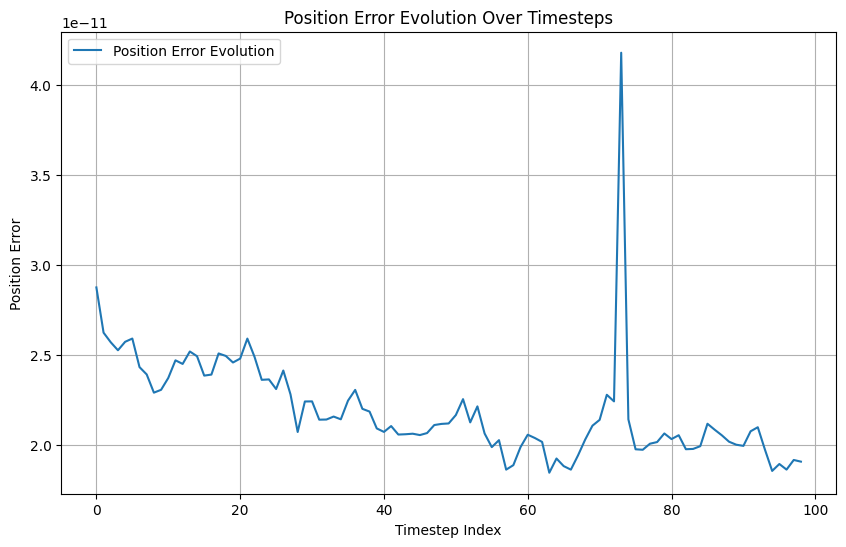

Cumulative velocity error for selected orbits: 3.3848133076135966e-08
Average velocity error per time step: 3.419003341023835e-10


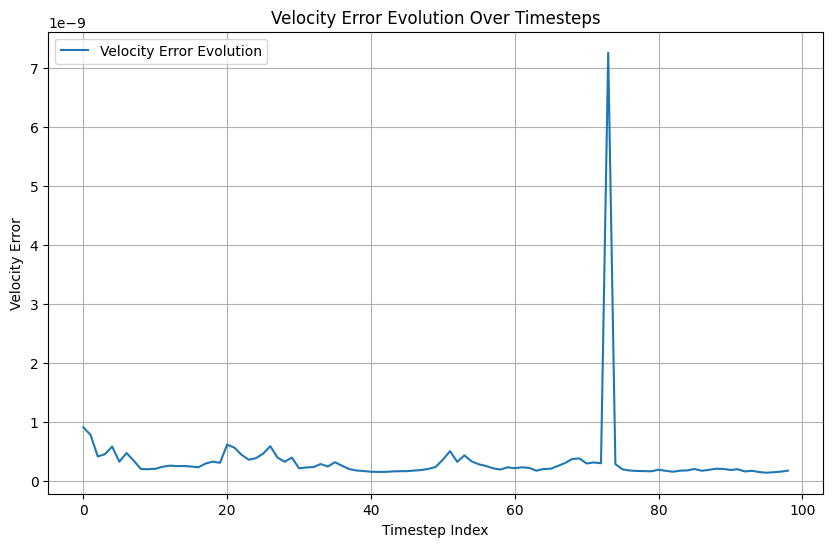

Cumulative energy error for selected orbits: 9.8349084431959e-10
Average energy error per time step: 9.934250952723132e-12


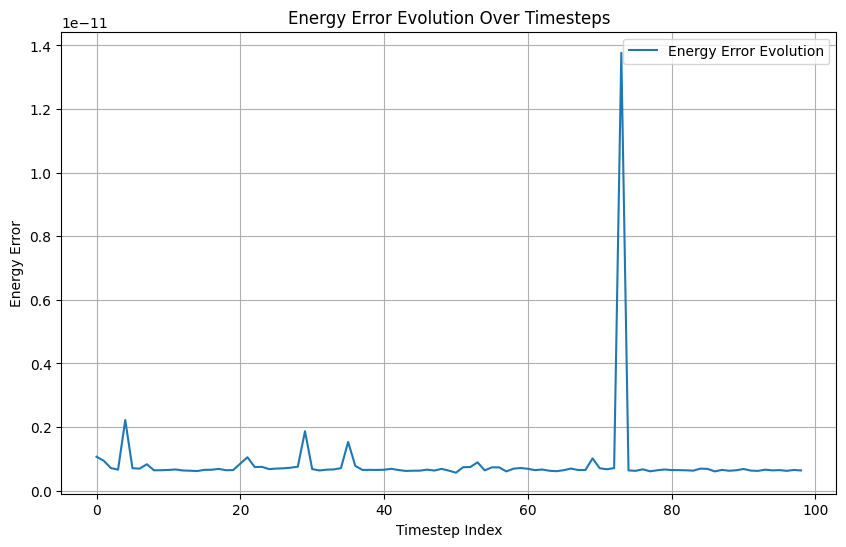

In [17]:
errors = calculate_errors(sampled_orbits, EM_MU, time_step=0.01)

In [18]:
file_path = '/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5'
orbits, orbit_df, system_dict = get_first_period_of_fixed_period_dataset(file_path)
orbits.shape

(45211, 7, 1500)

In [19]:
sampled_orbits, _ = sample_orbits(orbits, num_samples)

Cumulative position error for selected orbits: 1.7714483832287074e-05
Average position error per time step: 1.1817534244354285e-08


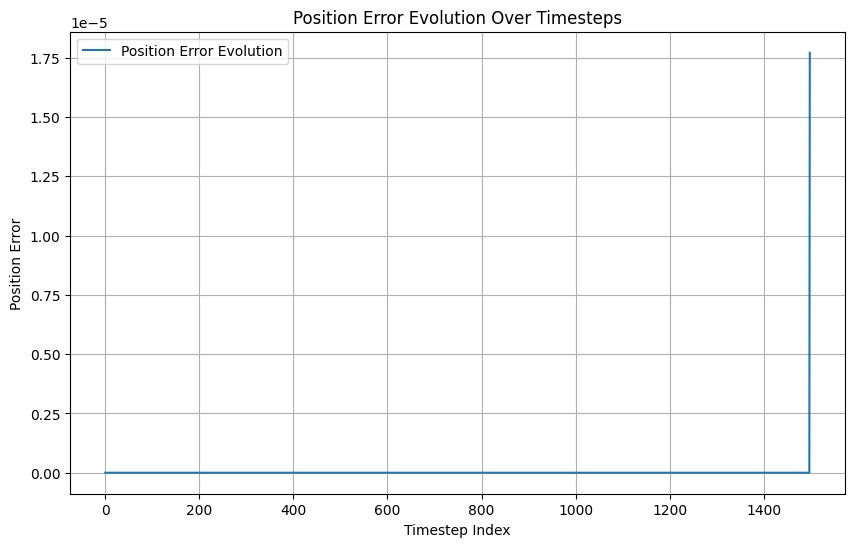

Cumulative velocity error for selected orbits: 0.004528014837612667
Average velocity error per time step: 3.020690351976429e-06


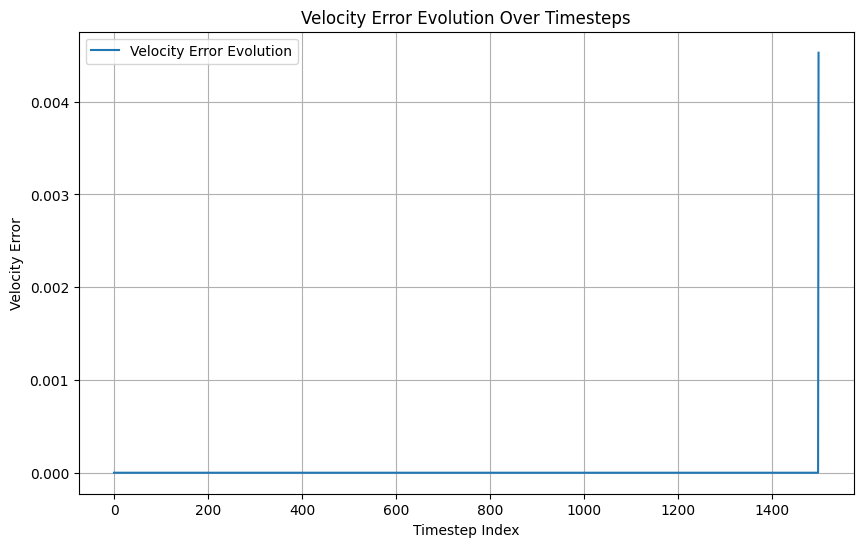

Cumulative energy error for selected orbits: 1.3778283869392283e-07
Average energy error per time step: 9.191650346492517e-11


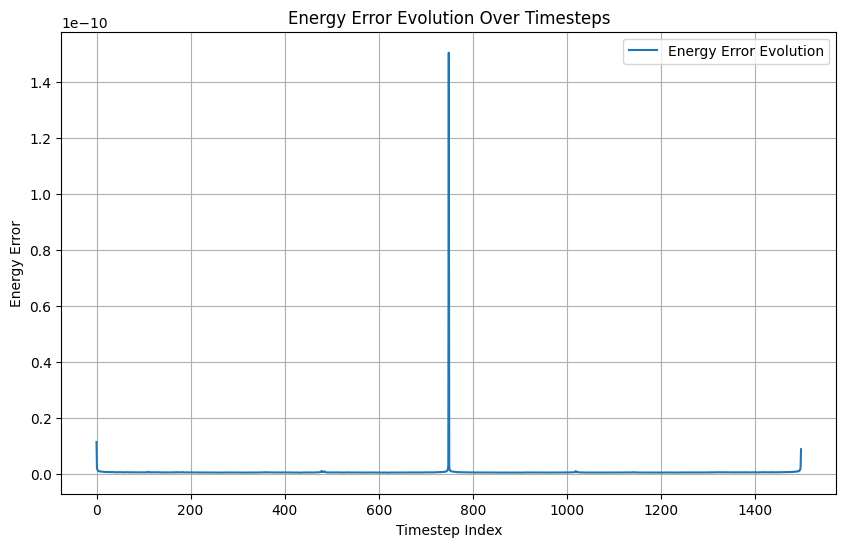

In [20]:
errors = calculate_errors(sampled_orbits, EM_MU)